In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [22]:
dataset1 = pd.read_csv('/content/Data_set (1) (1).csv')
dataset1.dropna(subset=['rating'], inplace=True)
print(dataset1.columns)
X = dataset1[['num_episodes']].values
y = dataset1[['rating']].values

Index(['show_name', 'country', 'num_episodes', 'aired_on', 'original_network',
       'rating', 'current_overall_rank', 'lifetime_popularity_rank',
       'watchers'],
      dtype='object')


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [24]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [25]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


In [26]:
# Name:SANTHOSH KUMAR A
# Register Number:212224230250
class NeuralNet(nn.Module):
  def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 8)
        self.fc2 = nn.Linear(8, 10)
        self.fc3 = nn.Linear(10, 1)

        self.relu = nn.ReLU()
        self.history = {'loss': []}

  def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


ai_brain = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(ai_brain.parameters(), lr=0.001)

In [27]:
def train_model(model, X_train, y_train, criterion, optimizer, epochs=2000):

    for epoch in range(epochs):
        optimizer.zero_grad()

        output = model(X_train)
        loss = criterion(output, y_train)

        loss.backward()
        optimizer.step()

        model.history['loss'].append(loss.item())

        if epoch % 200 == 0:
            print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}")



In [28]:
train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)

Epoch [0/2000], Loss: 65.741997
Epoch [200/2000], Loss: 6.945817
Epoch [400/2000], Loss: 0.189419
Epoch [600/2000], Loss: 0.185147
Epoch [800/2000], Loss: 0.182392
Epoch [1000/2000], Loss: 0.181869
Epoch [1200/2000], Loss: 0.181866
Epoch [1400/2000], Loss: 0.184583
Epoch [1600/2000], Loss: 0.182369
Epoch [1800/2000], Loss: 0.182190


In [29]:

with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')


Test Loss: 0.169160


In [30]:
loss_df = pd.DataFrame(ai_brain.history)

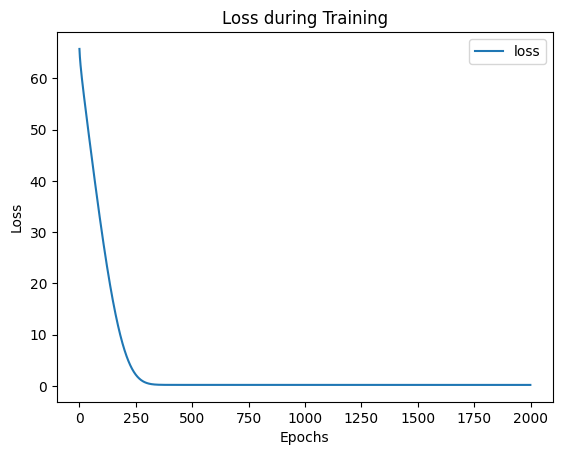

In [31]:

import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()


In [32]:

X_n1_1 = torch.tensor([[9]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 8.213179588317871
